# **Import Required Libraries**

In [2]:
#connecting Google drive with Google colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
#importing essential libraries
import numpy as np   #linear Algebra
import pandas as pd  #data processing, CSV file I/O

# Exploratory Data Analysis

**Load and Prepare Data**

In [4]:
#loading the dataset
data=pd.read_csv("/content/drive/MyDrive/Restaurant_Reviews.tsv",delimiter='\t',quoting=3)

In [5]:
# shape=tuple of array dimension(row,column)
data.shape

(1000, 2)

In [6]:
#return the label of each column in the DataFrame
data.columns

Index(['Review', 'Liked'], dtype='object')

In [7]:
#view the data
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [8]:
# Information about the DataFrame
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

# Data Preprocessing

In [9]:
# Importing essential libraries for performing Natural Language Processing on 'Restaurant_Reviews.tsv' dataset
import nltk #Natural Language Toolkit, is a Python package that you can use for NLP
import re   #regular expressions
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
# Cleaning the reviews
corpus=[]
for i in range(0,1000):
  #Cleaning special character from the reviews

  #the re.sub() method performs global search and global replace on the given string
  review=re.sub(pattern='[^a-zA-Z]',repl=" ",string=data['Review'][i])
  review=review.lower()

  # Tokenizing the review by words
  review_words=review.split()

  #  Removing the stop words
  review_words=[word for word in review_words if not word in set(stopwords.words('english'))]

  # Stemming the words
  ps=PorterStemmer()
  review=[ps.stem(word) for word in review_words]

  # Joining the stemmed words
  review=' '.join(review)

  # creating a corpus
  corpus.append(review)

In [11]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [12]:
# Creating the Bag of Words model

tfidf_vectorizer = TfidfVectorizer(max_features=1500)
X = tfidf_vectorizer.fit_transform(corpus).toarray()
y = data.iloc[:, 1].values

# Split Data - (1000,1500)


*   In this step we are going to split data into two parts (training and testing), so that we can train our model on traing dataset and test its accuracy on unseen test data








In [13]:
from sklearn.model_selection import train_test_split #use to split the original data into training data & test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

#random_state simply sets seed to random generator, so that your train-test splits are always deterministic. If you don't set seed, it is different each time.


#training (1000,1500)
# 1000*80/100=800
# 1000*20/100=200


In [14]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

# Model Training


*   As we have done with preprocessing part, it is time to train our model.





**Support Vector Classifier (SVC):**Support Vector Classifier (SVC) is a supervised machine learning algorithm used for binary classification tasks by finding the optimal hyperplane that maximizes the margin between two classes.



In [23]:
classifier = SVC(kernel='poly', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

In [24]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0])

In [25]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1=accuracy_score(y_test,y_pred)
score2=precision_score(y_test,y_pred)
score3=recall_score(y_test,y_pred)
print("---------scores---------")
print("Accuracy score is : {}%".format(round(score1*100,2)))
print("Precison score is : {}%".format(round(score2*100,2)))
print("recall score is : {}%".format(round(score3*100,2)))


---------scores---------
Accuracy score is : 76.5%
Precison score is : 81.82%
recall score is : 69.9%


In [26]:
# making the confusion matrix
# A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualization and summarization the performance of a classification  model
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [27]:
cm

array([[81, 16],
       [31, 72]])

Text(95.72222222222221, 0.5, 'Actual values')

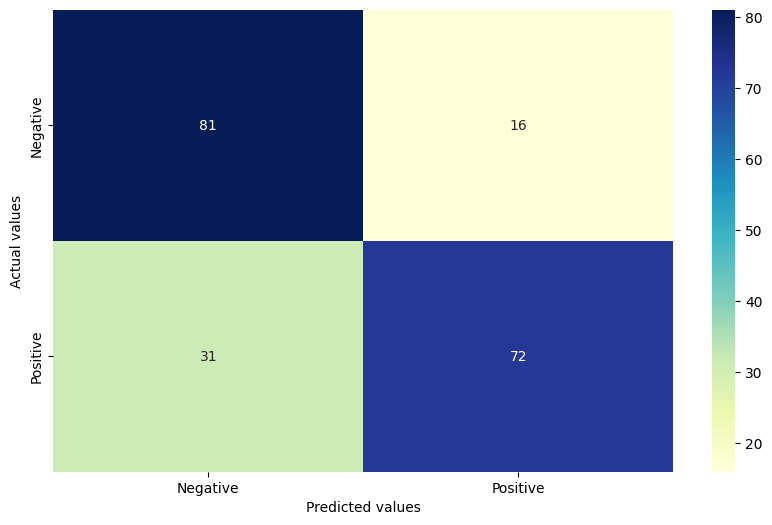

In [28]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap="YlGnBu",xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [29]:
classifier = SVC(kernel='poly', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

# **Predictions**

In [32]:
# Sample review predictions
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)
    temp = tfidf_vectorizer.transform([final_review]).toarray()
    return classifier.predict(temp)


In [33]:
sample_review="the restaurant food was very good but service was not satisfactory"
if predict_sentiment(sample_review):
  print("This is a Positive review")
else:
  print("This is a Negative review")


This is a Positive review


In [34]:
sample_review="the restaurant food was very good"
if predict_sentiment(sample_review):
  print("This is a Positive review")
else:
  print("This is a Negative review")

This is a Positive review


In [35]:
sample_review="Food was pretty bad and the service was very slow"
if predict_sentiment(sample_review):
  print("This is a Positive review")
else:
  print("This is a Negative review")

This is a Negative review
